In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
Y_train

array([8, 3, 5, ..., 6, 7, 6])

In [5]:
def init_params():
    w1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return w1,b1,w2,b2

def ReLU(x):
    return np.maximum(x,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(x,w1,w2,b1,b2):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return a2,a1,z1,z2

def onehot(x):
    onehot_x = np.zeros((x.size, x.max() + 1))
    onehot_x[np.arange(x.size),x] = 1
    y = onehot_x.T
    return y

def deriv_ReLU(x):
    return x > 0

def back_prop(a2,a1,z1,z2,w2,x,y):
    onehot_y = onehot(y)
    dz2 = a2 - onehot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)
    return db1,dw1,db2,dw2

def update_params(w1,w2,b1,b2,db1,dw1,db2,dw2,alpha):
    w1 = w1 - alpha*dw1
    w2 = w2 - alpha*dw2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return w1,w2,b1,b2

In [6]:
def get_predictions(x):
    return np.argmax(x,0)

def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x,y,iterations,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        a2,a1,z1,z2 = forward_prop(x,w1,w2,b1,b2)
        db1,dw1,db2,dw2 = back_prop(a2,a1,z1,z2,w2,x,y)
        w1,w2,b1,b2 = update_params(w1,w2,b1,b2,db1,dw1,db2,dw2,alpha)
        if i%50 == 0:
            print("iteration: ",i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions,y))
    return w1,w2,b1,b2

In [7]:
w1,w2,b1,b2 = gradient_descent(X_train,Y_train,501,0.10)

iteration:  0
[4 9 4 ... 6 6 1] [8 3 5 ... 6 7 6]
0.1015609756097561
iteration:  50
[8 5 3 ... 6 3 9] [8 3 5 ... 6 7 6]
0.3747560975609756
iteration:  100
[8 5 3 ... 6 5 0] [8 3 5 ... 6 7 6]
0.5930731707317073
iteration:  150
[8 5 3 ... 6 7 0] [8 3 5 ... 6 7 6]
0.6800243902439025
iteration:  200
[8 3 3 ... 6 7 0] [8 3 5 ... 6 7 6]
0.7404634146341463
iteration:  250
[8 3 5 ... 6 7 6] [8 3 5 ... 6 7 6]
0.7803170731707317
iteration:  300
[8 3 5 ... 6 7 6] [8 3 5 ... 6 7 6]
0.8077317073170732
iteration:  350
[8 3 5 ... 6 7 6] [8 3 5 ... 6 7 6]
0.8260975609756097
iteration:  400
[8 3 5 ... 6 7 6] [8 3 5 ... 6 7 6]
0.8394146341463414
iteration:  450
[8 3 5 ... 6 7 6] [8 3 5 ... 6 7 6]
0.8490243902439024
iteration:  500
[8 3 5 ... 6 7 6] [8 3 5 ... 6 7 6]
0.8561463414634146


In [8]:
def make_predictions(x, w1, b1, w2, b2):
    a2, _, _, _ = forward_prop(x,w1,w2,b1,b2)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


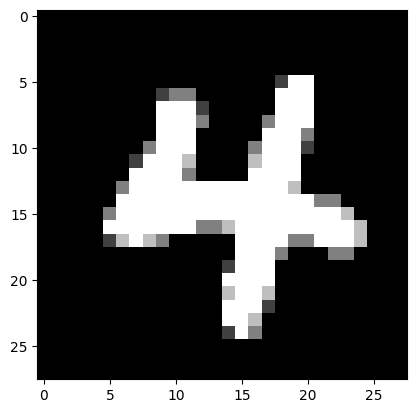

In [9]:
test_prediction(7, w1, b1, w2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 8 8 1 3 5 6 3 5 0 1 5 3 5 9 0 9 9 8 5 6 7 3 6 0 5 2 6 4 7 0 8 3 2 8 5 4
 7 3 2 9 9 6 7 4 6 1 6 3 2 2 2 5 9 6 0 0 0 2 3 0 3 9 6 8 8 1 8 8 0 9 8 8 2
 3 4 8 2 4 0 7 8 6 3 9 3 7 2 4 6 4 4 7 5 7 7 9 0 3 0 7 4 1 6 6 3 6 6 3 7 0
 6 4 6 8 6 1 4 2 3 2 4 2 0 6 9 8 0 8 8 9 4 9 2 3 3 5 6 7 7 7 2 0 6 3 3 0 9
 3 8 0 3 1 9 4 9 7 4 2 1 7 9 9 9 8 2 6 4 3 5 7 2 6 1 3 1 6 1 7 9 9 7 5 4 8
 3 3 4 8 0 6 3 9 9 1 0 1 9 1 4 6 0 3 6 0 6 3 4 9 6 3 2 6 7 3 7 6 7 7 1 1 1
 1 2 6 0 3 9 6 5 1 4 3 3 9 9 5 5 3 9 0 5 8 3 3 7 0 2 7 1 9 2 0 6 2 4 8 8 9
 1 1 4 9 5 4 8 0 0 6 0 2 4 1 7 3 1 7 0 8 0 9 3 9 2 0 8 7 0 8 6 7 1 1 4 5 6
 9 9 5 1 3 6 9 7 4 0 7 0 6 7 3 4 4 4 1 7 2 6 3 9 3 0 3 9 2 1 4 4 5 2 5 1 7
 3 4 1 9 4 2 1 3 8 0 0 5 2 6 5 8 1 8 8 4 1 7 0 2 7 3 4 4 2 8 9 3 8 2 5 5 8
 4 3 7 8 0 8 4 6 5 0 1 4 9 0 8 0 0 3 3 0 5 9 9 5 8 1 9 1 2 8 1 7 3 4 1 0 8
 0 9 4 1 9 9 8 3 4 5 5 9 9 1 0 6 8 1 4 0 0 7 4 8 5 2 9 7 0 8 4 6 3 2 7 8 4
 0 0 0 2 0 6 5 5 1 1 1 6 1 3 6 4 3 8 7 8 2 4 9 7 8 3 6 7 6 1 3 3 2 5 9 1 3
 5 2 1 7 1 9 8 2 1 0 9 4 

0.841